<a href="https://colab.research.google.com/github/atakanerdogn/MY-PROJECTS-DATA-ANALYSIS/blob/main/edureka_heart_disease%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The conclusions and insights will be explained through the code numerically.

I explored in this project the interrelating factors such as high blood pressure, high cholesterol, smoking, alcohol consumption, physical activity and vegetarianism to the heart disease.

As machine learning methods, linear regression, random forest classifier, decision tree classifier, gradient boosting classifier were used.

The relevant  explanations were embedded into the code.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
heart= pd.read_csv('/content/heartdisease_u5z_lx9fv.csv')
heart.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
heart.describe()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,28.382364,0.443169,0.296921,0.756544,0.634256,0.811420,0.056197,3.184772,4.242081,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,6.608694,0.496761,0.698160,0.429169,0.481639,0.391175,0.230302,7.412847,8.717951,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,31.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Diabetes              253680 non-null  float64
 6   PhysActivity          253680 non-null  float64
 7   Fruits                253680 non-null  float64
 8   Veggies               253680 non-null  float64
 9   HvyAlcoholConsump     253680 non-null  float64
 10  MentHlth              253680 non-null  float64
 11  PhysHlth              253680 non-null  float64
 12  Sex                   253680 non-null  float64
 13  Age                   253680 non-null  float64
 14  Education             253680 non-null  float64
 15  

In [ ]:
heart.shape

(253680, 16)

In [ ]:
heart.isnull().sum()

,0
HeartDiseaseorAttack,0
HighBP,0
HighChol,0
BMI,0
Smoker,0
Diabetes,0
PhysActivity,0
Fruits,0
Veggies,0
HvyAlcoholConsump,0


In [ ]:
heart.duplicated().sum()

np.int64(42852)

In [ ]:
heart['HeartDiseaseorAttack'].value_counts()

,count
HeartDiseaseorAttack,
0.0,229787
1.0,23893


In [ ]:
# it seems to be there are lots of people without heart disease in the data

In [ ]:
heart.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'BMI', 'Smoker',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [ ]:
heart_c = heart.select_dtypes(include=['object'])
heart_c.head()
# which means all are numeric columns

""
0
1
2
3
4


In [ ]:
heart_sampled = heart.sample(n=10000, random_state=42)
heart_sampled.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
219620,0.0,0.0,0.0,21.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,7.0,0.0,7.0,4.0,2.0
132821,0.0,1.0,1.0,28.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,13.0,6.0,6.0
151862,0.0,0.0,0.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,7.0
139717,0.0,0.0,0.0,27.0,1.0,0.0,1.0,0.0,1.0,1.0,3.0,0.0,1.0,2.0,4.0,7.0
239235,0.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,27.0,27.0,0.0,8.0,3.0,2.0


In [ ]:
heart_disease = heart[heart['HeartDiseaseorAttack'] == 1]
heart_disease.head()

heart_disease.shape

(23893, 16)

In [ ]:
heart_disease.describe()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
count,23893.0,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000
mean,1.0,0.750345,0.701168,29.466622,0.619470,0.687231,0.640355,0.604696,0.763906,0.035492,4.670322,9.154439,0.572887,10.131210,4.745951,5.148161
std,0.0,0.432822,0.457756,6.740591,0.485527,0.935105,0.479906,0.488926,0.424690,0.185023,9.192712,11.873898,0.494669,2.218853,1.061990,2.198956
min,1.0,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.0,1.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,4.000000,3.000000
50%,1.0,1.000000,1.000000,28.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,10.000000,5.000000,5.000000
75%,1.0,1.000000,1.000000,33.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,20.000000,1.000000,12.000000,6.000000,7.000000
max,1.0,1.000000,1.000000,98.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23893 entries, 8 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartDiseaseorAttack  23893 non-null  float64
 1   HighBP                23893 non-null  float64
 2   HighChol              23893 non-null  float64
 3   BMI                   23893 non-null  float64
 4   Smoker                23893 non-null  float64
 5   Diabetes              23893 non-null  float64
 6   PhysActivity          23893 non-null  float64
 7   Fruits                23893 non-null  float64
 8   Veggies               23893 non-null  float64
 9   HvyAlcoholConsump     23893 non-null  float64
 10  MentHlth              23893 non-null  float64
 11  PhysHlth              23893 non-null  float64
 12  Sex                   23893 non-null  float64
 13  Age                   23893 non-null  float64
 14  Education             23893 non-null  float64
 15  Income                2

In [ ]:
heart_disease.isnull().sum()

,0
HeartDiseaseorAttack,0
HighBP,0
HighChol,0
BMI,0
Smoker,0
Diabetes,0
PhysActivity,0
Fruits,0
Veggies,0
HvyAlcoholConsump,0


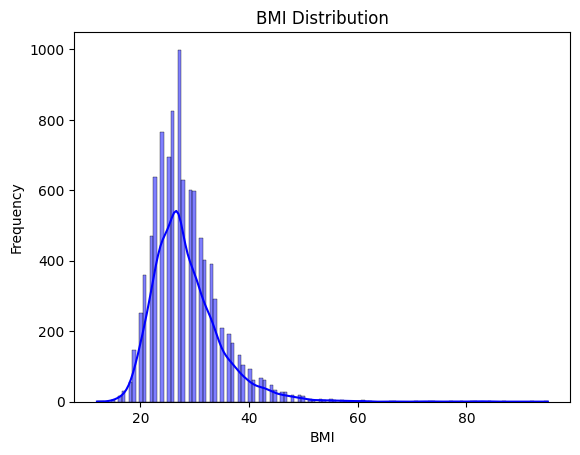

In [ ]:
# histplots

sns.histplot(heart_sampled['BMI'], kde=True, color='blue')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()

In [ ]:

heart['Diabetes'].value_counts()


,count
Diabetes,
0.0,213703
2.0,35346
1.0,4631


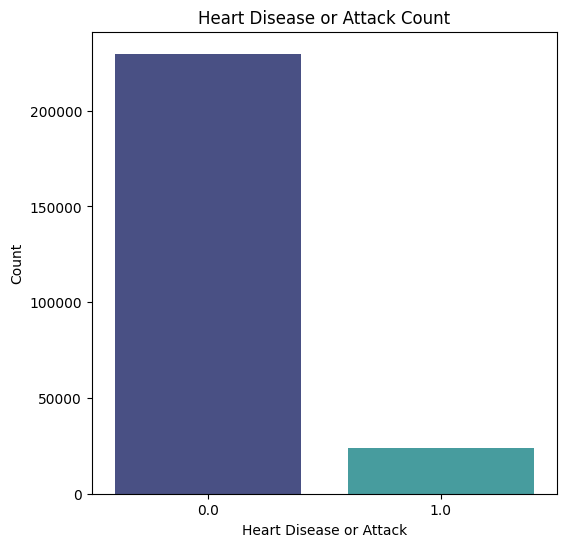

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='HeartDiseaseorAttack', data=heart,palette='mako' )
plt.xlabel('Heart Disease or Attack')
plt.ylabel('Count')
plt.title('Heart Disease or Attack Count')
plt.show()

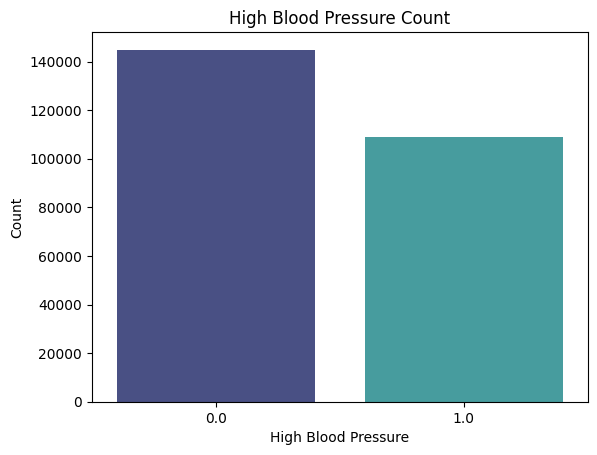

In [ ]:
sns.countplot(x='HighBP', data=heart, palette='mako')
plt.xlabel('High Blood Pressure')
plt.ylabel('Count')
plt.title('High Blood Pressure Count')
plt.show()

In [ ]:
heart['HighBP'].value_counts()

,count
HighBP,
False,144851
True,108829


In [ ]:
heart = heart.drop('HighBP', axis=1)
# we drop it because it is unneccessary

In [ ]:
heart['HighChol'].value_counts()

,count
HighChol,
False,146089
True,107591


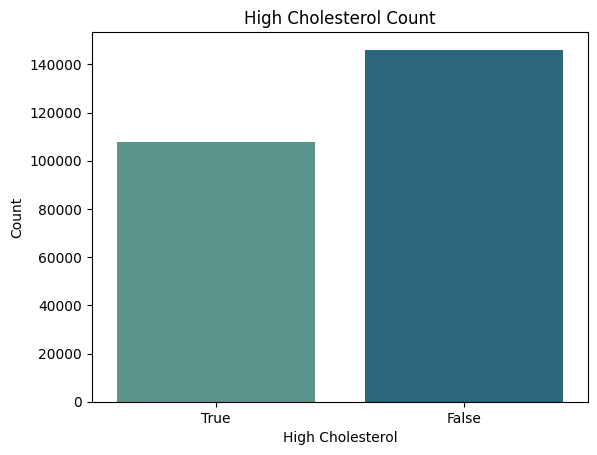

In [ ]:
sns.countplot(x='HighChol', data=heart, palette='crest')
plt.xlabel('High Cholesterol')
plt.ylabel('Count')
plt.title('High Cholesterol Count')
plt.show()

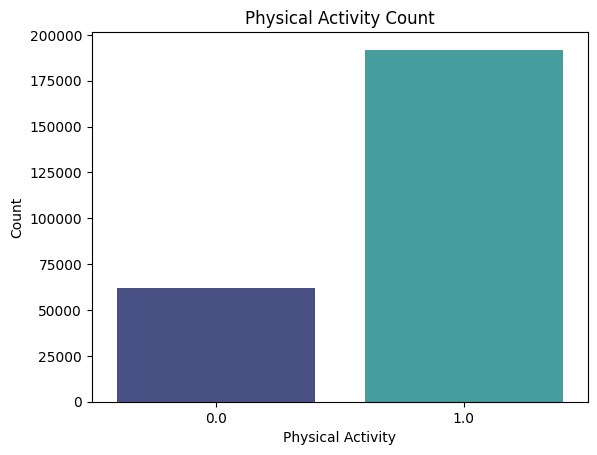

In [ ]:
# physical activity

sns.countplot(x='PhysActivity', data=heart, palette='mako')
plt.xlabel('Physical Activity')
plt.ylabel('Count')
plt.title('Physical Activity Count')
plt.show()

In [ ]:
# fruit and veggies

Text(0.5, 1.0, 'Veggies')

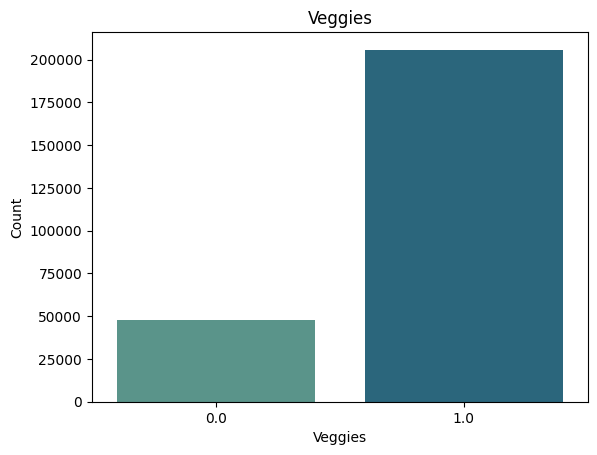

In [ ]:
sns.countplot(x='Veggies', data=heart, palette='crest')
plt.xlabel('Veggies')
plt.ylabel('Count')
plt.title('Veggies')

Text(0.5, 1.0, 'Heavy Alcohol Consumption')

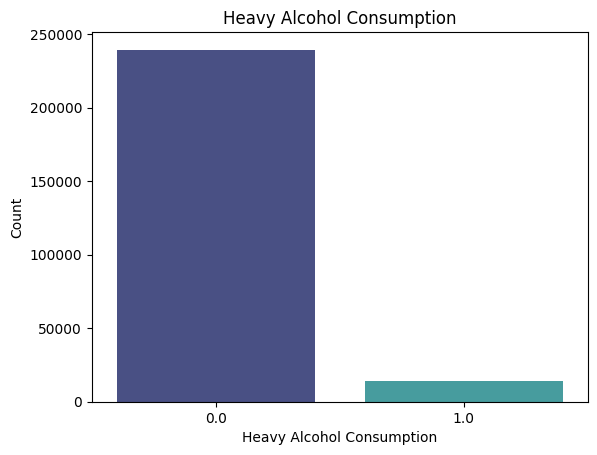

In [ ]:
sns.countplot(x='HvyAlcoholConsump', data=heart, palette='mako')
plt.xlabel('Heavy Alcohol Consumption')
plt.ylabel('Count')
plt.title('Heavy Alcohol Consumption')

Text(0.5, 1.0, 'Sex Distribution')

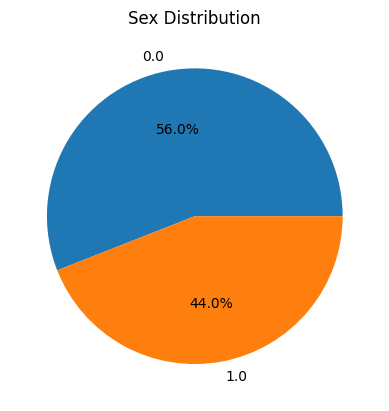

In [ ]:
sex = heart['Sex'].value_counts()
sex
plt.pie(sex, labels=sex.index, autopct='%1.1f%%')
plt.title('Sex Distribution')

In [ ]:
heart.columns

Index(['HeartDiseaseorAttack', 'HighChol', 'BMI', 'Smoker', 'Diabetes',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'MentHlth',
       'PhysHlth', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [ ]:
heart['Diabetes'].value_counts()

,count
Diabetes,
0.0,213703
2.0,35346
1.0,4631


Text(0.5, 1.0, 'Diabetes Distribution')

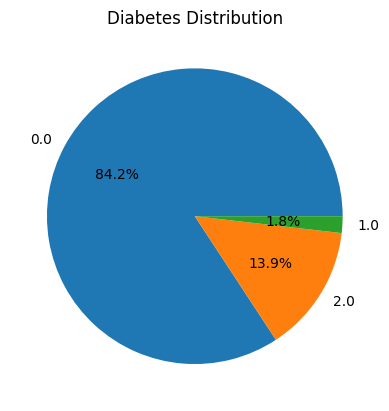

In [ ]:
diabetes = heart['Diabetes'].value_counts()
diabetes
plt.pie(diabetes, labels=diabetes.index, autopct='%1.1f%%')
plt.title('Diabetes Distribution')

In [ ]:
sample_for_mental = heart.sample(n=10000, random_state=42)
sample_for_mental.head()

,HeartDiseaseorAttack,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
219620,False,False,21.0,False,0.0,0.0,1.0,1.0,0.0,3.0,7.0,0.0,7.0,4.0,2.0
132821,False,True,28.0,False,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,13.0,6.0,6.0
151862,False,False,24.0,False,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,7.0
139717,False,False,27.0,True,0.0,1.0,0.0,1.0,1.0,3.0,0.0,1.0,2.0,4.0,7.0
239235,False,True,31.0,True,0.0,0.0,1.0,1.0,0.0,27.0,27.0,0.0,8.0,3.0,2.0


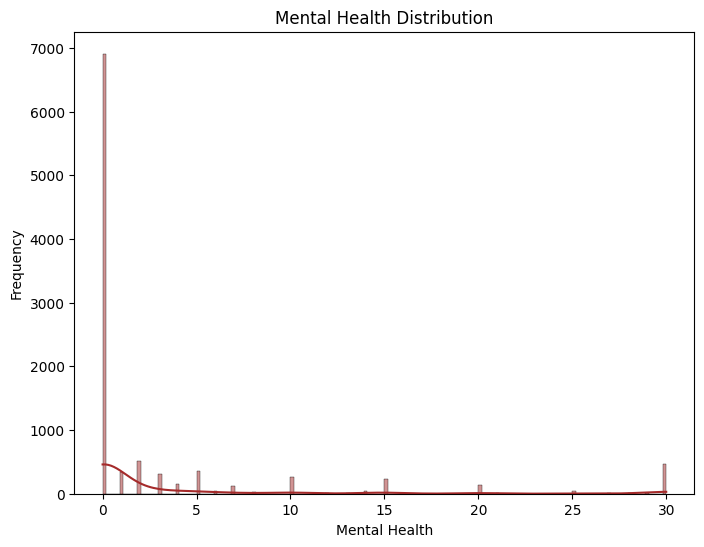

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(sample_for_mental['MentHlth'], kde=True, color='brown')
plt.xlabel('Mental Health')
plt.ylabel('Frequency')
plt.title('Mental Health Distribution')
plt.show()

# patients are mostly mentally healthy

### **BIVARIATE ANALYSIS**

In [ ]:
# heart disease or attack vs bmi

heart_bmi = heart.groupby('HeartDiseaseorAttack')['BMI'].mean()
heart_bmi

,BMI
HeartDiseaseorAttack,
False,28.269624
True,29.466622


Text(0.5, 1.0, 'Heart Disease or Attack vs BMI')

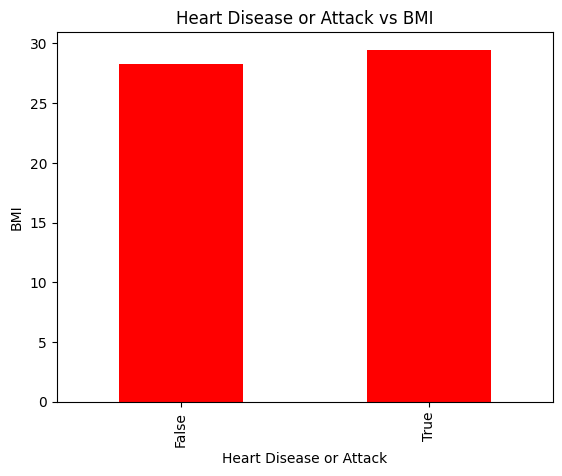

In [ ]:
heart_bmi.plot(kind='bar', color='red')
plt.xlabel('Heart Disease or Attack')
plt.ylabel('BMI')
plt.title('Heart Disease or Attack vs BMI')

In [ ]:
# heart disease vs physical activity

hp = heart.groupby('HeartDiseaseorAttack')['PhysActivity'].mean()
hp


,PhysActivity
HeartDiseaseorAttack,
False,0.768625
True,0.640355


In [ ]:
# heart disaese vs veggies

hv = heart.groupby('HeartDiseaseorAttack')['Veggies'].mean()
hv

hv_df = pd.DataFrame(hv)
hv_df.style.background_gradient(cmap='Blues')

,Veggies
HeartDiseaseorAttack,
False,0.816360
True,0.763906


In [ ]:
heart.columns

Index(['HeartDiseaseorAttack', 'HighChol', 'BMI', 'Smoker', 'Diabetes',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'MentHlth',
       'PhysHlth', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [ ]:
# i will import the dataset again in order to make all values numeric again

heart = pd.read_csv('/content/heartdisease_u5z_lx9fv.csv')
heart.isnull().sum()

,0
HeartDiseaseorAttack,0
HighBP,0
HighChol,0
BMI,0
Smoker,0
Diabetes,0
PhysActivity,0
Fruits,0
Veggies,0
HvyAlcoholConsump,0


In [ ]:
# heart disease vs high col

hc = heart.groupby('HeartDiseaseorAttack')['HighChol'].mean()
hc

,HighChol
HeartDiseaseorAttack,
0.0,0.395314
1.0,0.701168


In [ ]:
hs = heart.groupby('HeartDiseaseorAttack')['Smoker'].mean()
hs

,Smoker
HeartDiseaseorAttack,
0.0,0.424837
1.0,0.619470


In [ ]:
hal = heart.groupby('HeartDiseaseorAttack')['HvyAlcoholConsump'].mean()
hal

,HvyAlcoholConsump
HeartDiseaseorAttack,
0.0,0.058350
1.0,0.035492


### MULTIVARIATE ANALYSIS

In [ ]:
corr_matrix = heart.corr()
corr_matrix.style.background_gradient(cmap='Blues')

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.052904,0.114441,0.180272,-0.087299,-0.019790,-0.039167,-0.028991,0.064621,0.181698,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.213748,0.096991,0.271596,-0.125267,-0.040555,-0.061266,-0.003972,0.056456,0.161212,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.106722,0.091299,0.209085,-0.078046,-0.040859,-0.039874,-0.011543,0.062069,0.121751,0.031205,0.272318,-0.070802,-0.085459
BMI,0.052904,0.213748,0.106722,1.000000,0.013804,0.224379,-0.147294,-0.087518,-0.062275,-0.048736,0.085310,0.121141,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,0.013804,1.000000,0.062914,-0.087401,-0.077666,-0.030678,0.101619,0.092196,0.116460,0.093662,0.120641,-0.161955,-0.123937
Diabetes,0.180272,0.271596,0.209085,0.224379,0.062914,1.000000,-0.121947,-0.042192,-0.058972,-0.057882,0.073507,0.176287,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,-0.147294,-0.087401,-0.121947,1.000000,0.142756,0.153150,0.012392,-0.125587,-0.219230,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,-0.087518,-0.077666,-0.042192,0.142756,1.000000,0.254342,-0.035288,-0.068217,-0.044633,-0.091175,0.064547,0.110187,0.079929
Veggies,-0.039167,-0.061266,-0.039874,-0.062275,-0.030678,-0.058972,0.153150,0.254342,1.000000,0.021064,-0.058884,-0.064290,-0.064765,-0.009771,0.154329,0.151087
HvyAlcoholConsump,-0.028991,-0.003972,-0.011543,-0.048736,0.101619,-0.057882,0.012392,-0.035288,0.021064,1.000000,0.024716,-0.026415,0.005740,-0.034578,0.023997,0.053619


ANALYSIS OF THE PEOPLE WITH HEART DISEASE OR ATTACK

In [ ]:
heart_disease = heart[heart['HeartDiseaseorAttack'] == 1]
heart_disease.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
8,1.0,1.0,1.0,30.0,1.0,2.0,0.0,1.0,1.0,0.0,30.0,30.0,0.0,9.0,5.0,1.0
20,1.0,1.0,1.0,22.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,0.0,0.0,12.0,4.0,4.0
26,1.0,1.0,1.0,37.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,6.0,5.0
27,1.0,1.0,1.0,28.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12.0,2.0,4.0
47,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,10.0,4.0,7.0


In [ ]:
heart_disease.value_counts()

HeartDiseaseorAttack  HighBP  HighChol  BMI   Smoker  Diabetes  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  MentHlth  PhysHlth  Sex  Age   Education  Income
1.0                   1.0     1.0       27.0  1.0     0.0       1.0           1.0     1.0      0.0                0.0       0.0       1.0  11.0  6.0        8.0       6
                                        25.0  1.0     0.0       1.0           1.0     1.0      0.0                0.0       0.0       1.0  13.0  6.0        8.0       6
                                        29.0  0.0     0.0       1.0           1.0     1.0      0.0                0.0       0.0       1.0  11.0  6.0        8.0       5
                                        27.0  1.0     0.0       1.0           1.0     1.0      0.0                0.0       0.0       1.0  13.0  6.0        8.0       5
                                        24.0  0.0     0.0       1.0           1.0     1.0      0.0                0.0       0.0       1.0  10.0  6.0        8.0       5
                                                                                                                                                                     ..
                              0.0       28.0  1.0     0.0       1.0           1.0     1.0      0.0                0.0       0.0       1.0  13.0  4.0        5.0       1
                                                                                                                                           12.0  6.0        6.0       1
                                                                                                                                                 5.0        7.0       1
                                                                                                                                           11.0  6.0        4.0       1
                                                                                                                            6.0       1.0  13.0  5.0        5.0       1
Name: count, Length: 23343, dtype: int64

In [ ]:
heart_disease.describe()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
count,23893.0,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000,23893.000000
mean,1.0,0.750345,0.701168,29.466622,0.619470,0.687231,0.640355,0.604696,0.763906,0.035492,4.670322,9.154439,0.572887,10.131210,4.745951,5.148161
std,0.0,0.432822,0.457756,6.740591,0.485527,0.935105,0.479906,0.488926,0.424690,0.185023,9.192712,11.873898,0.494669,2.218853,1.061990,2.198956
min,1.0,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.0,1.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,4.000000,3.000000
50%,1.0,1.000000,1.000000,28.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,10.000000,5.000000,5.000000
75%,1.0,1.000000,1.000000,33.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,20.000000,1.000000,12.000000,6.000000,7.000000
max,1.0,1.000000,1.000000,98.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
heart_disease.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'BMI', 'Smoker',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [ ]:

hb = heart_disease.groupby('HeartDiseaseorAttack')['HighBP'].mean()
hb

,HighBP
HeartDiseaseorAttack,
1.0,0.750345


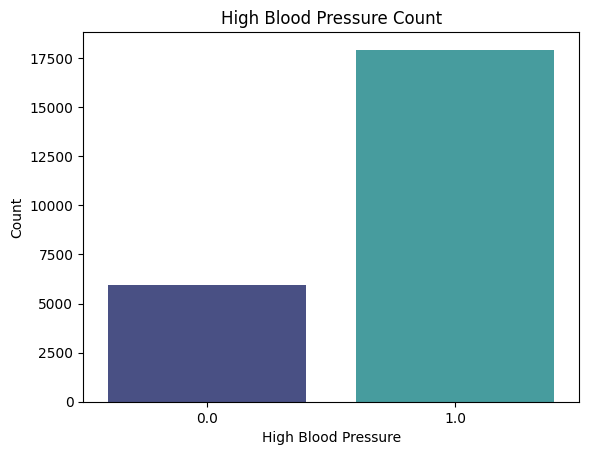

In [ ]:
sns.countplot(x='HighBP', data=heart_disease, palette='mako')
plt.xlabel('High Blood Pressure')
plt.ylabel('Count')
plt.title('High Blood Pressure Count')
plt.show()

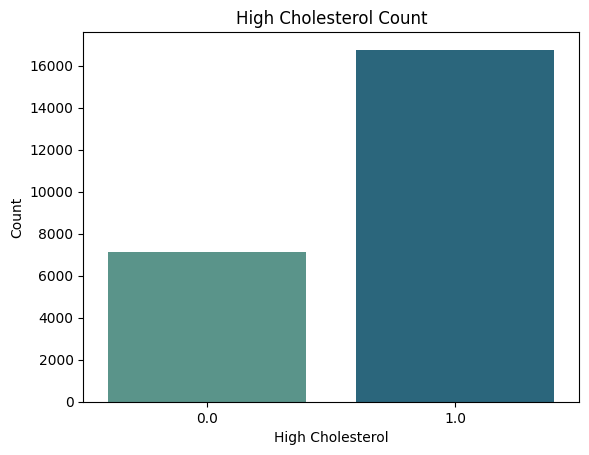

In [ ]:
sns.countplot(x='HighChol', data=heart_disease, palette='crest')
plt.xlabel('High Cholesterol')
plt.ylabel('Count')
plt.title('High Cholesterol Count')
plt.show()

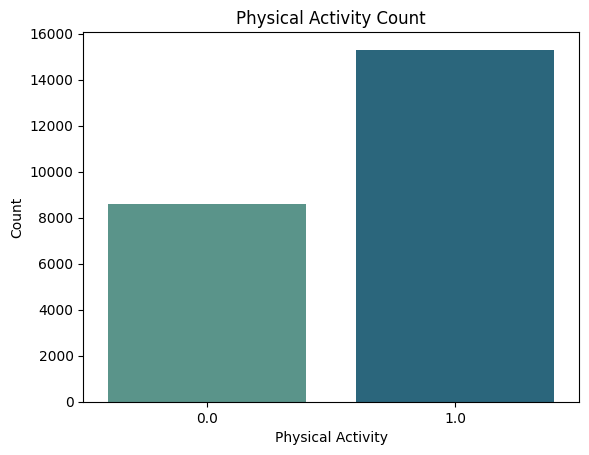

In [ ]:
sns.countplot(x='PhysActivity', data=heart_disease, palette='crest')
plt.xlabel('Physical Activity')
plt.ylabel('Count')
plt.title('Physical Activity Count')
plt.show()
#

In [ ]:
# physical activity and heart disease
phd = heart_disease.groupby('HeartDiseaseorAttack')['PhysActivity'].mean()
phd

,PhysActivity
HeartDiseaseorAttack,
1.0,0.640355


In [ ]:
# smoking and heart disease

shd = heart_disease.groupby('HeartDiseaseorAttack')['Smoker'].mean()
shd

,Smoker
HeartDiseaseorAttack,
1.0,0.61947


In [ ]:
# veggies vs exercise

vh = heart_disease.groupby('PhysActivity')['Veggies'].mean()
vh

,Veggies
PhysActivity,
0.0,0.691377
1.0,0.804641


Text(0.5, 1.0, 'Veggies vs Physical Activity')

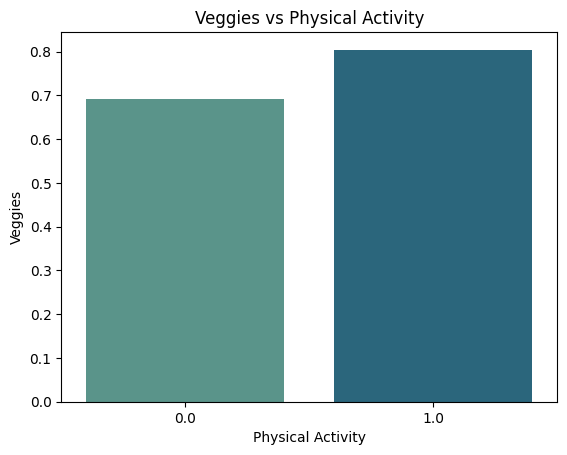

In [ ]:
sns.barplot(x=vh.index, y=vh.values, palette='crest')
plt.xlabel('Physical Activity')
plt.ylabel('Veggies')
plt.title('Veggies vs Physical Activity')

Text(0.5, 1.0, 'Veggies')

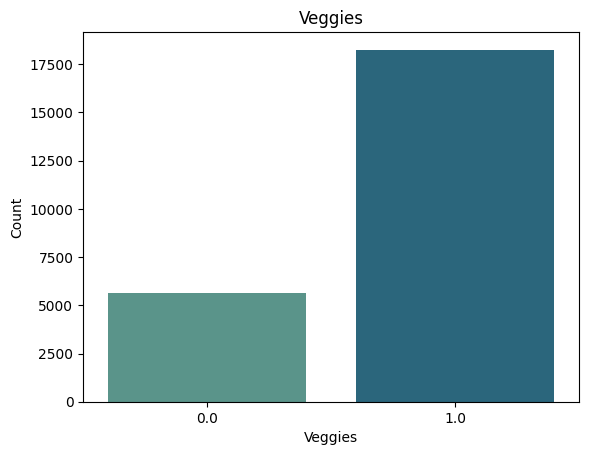

In [ ]:
sns.countplot(x='Veggies', data=heart_disease, palette='crest')
plt.xlabel('Veggies')
plt.ylabel('Count')
plt.title('Veggies')

In [ ]:
# smoking and exercise

se = heart_disease.groupby('Smoker')['PhysActivity'].mean()
se

,PhysActivity
Smoker,
0.0,0.669710
1.0,0.622323


Text(0.5, 1.0, 'Smoking vs Physical Activity')

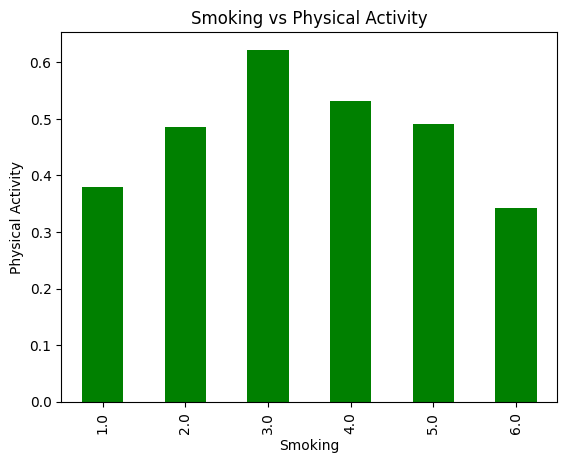

In [ ]:
se.plot(kind='bar', color='green')
plt.xlabel('Smoking')
plt.ylabel('Physical Activity')
plt.title('Smoking vs Physical Activity')

In [ ]:
heart_disease = heart_disease.drop('HeartDiseaseorAttack', axis=1)

In [ ]:
corr_matrix_heart_disease = heart_disease.corr()
corr_matrix_heart_disease.style.background_gradient(cmap='Blues')

,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
HighBP,1.000000,0.230999,0.153526,0.008791,0.161463,-0.051843,-0.021556,-0.020562,0.002460,0.035824,0.074765,-0.028879,0.076777,-0.063413,-0.090646
HighChol,0.230999,1.000000,0.057375,0.043317,0.102555,-0.012740,-0.030945,-0.001230,-0.003257,0.033610,0.030761,0.007840,0.021834,-0.005675,0.000868
BMI,0.153526,0.057375,1.000000,-0.026914,0.240095,-0.122780,-0.071702,-0.025935,-0.042343,0.089787,0.119944,-0.013583,-0.208125,-0.045376,-0.075762
Smoker,0.008791,0.043317,-0.026914,1.000000,0.009892,-0.047942,-0.091879,-0.031984,0.063686,0.057330,0.074497,0.127337,-0.045496,-0.096500,-0.055979
Diabetes,0.161463,0.102555,0.240095,0.009892,1.000000,-0.102093,-0.034340,-0.031442,-0.064778,0.074483,0.137323,0.000017,-0.009289,-0.076645,-0.121861
PhysActivity,-0.051843,-0.012740,-0.122780,-0.047942,-0.102093,1.000000,0.127213,0.127990,0.007532,-0.138354,-0.237319,0.118625,-0.005877,0.169500,0.193001
Fruits,-0.021556,-0.030945,-0.071702,-0.091879,-0.034340,0.127213,1.000000,0.255814,-0.023496,-0.066991,-0.046944,-0.064218,0.127522,0.113780,0.085583
Veggies,-0.020562,-0.001230,-0.025935,-0.031984,-0.031442,0.127990,0.255814,1.000000,0.012895,-0.063786,-0.056248,-0.023179,0.032431,0.135296,0.133326
HvyAlcoholConsump,0.002460,-0.003257,-0.042343,0.063686,-0.064778,0.007532,-0.023496,0.012895,1.000000,0.010079,-0.029567,0.043532,-0.044580,0.024376,0.048285
MentHlth,0.035824,0.033610,0.089787,0.057330,0.074483,-0.138354,-0.066991,-0.063786,0.010079,1.000000,0.375033,-0.133824,-0.237726,-0.114776,-0.241005


<Axes: >

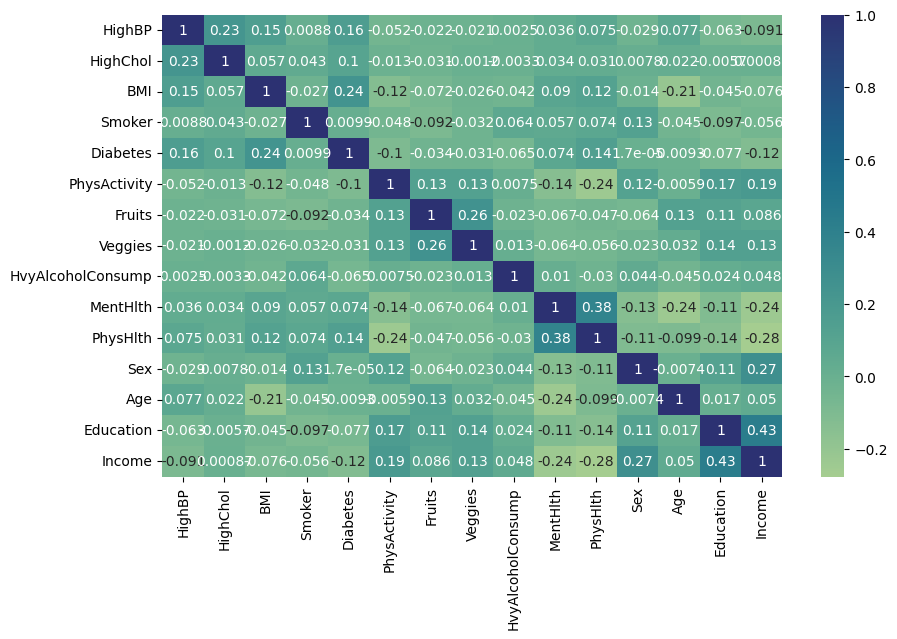

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_heart_disease, annot=True, cmap='crest')

NEW FEATURES TO BE CREATED
-  I have already grouped some of the interrelating variables  to one other.
- I will look after combining education and income, age and heavy alchohol consumption, education and vegeterianism, vegetarianism vs diabetes, smoker and heavy alcholism, bmi and smmoking, smoking and cholesterol, smoking and high bp, smoking and mental healh

<Axes: xlabel='Income', ylabel='Education'>

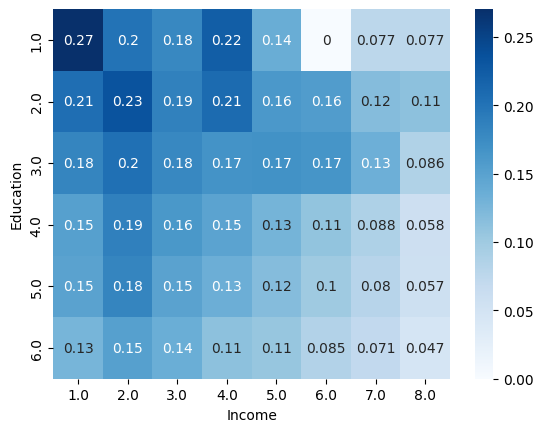

In [ ]:
# EDUCATION AND INCOME

ei = heart.groupby(['Education', 'Income'])['HeartDiseaseorAttack'].mean()
ei

sns.heatmap(ei.unstack(), annot=True, cmap='Blues')

<Axes: xlabel='Veggies', ylabel='Education'>

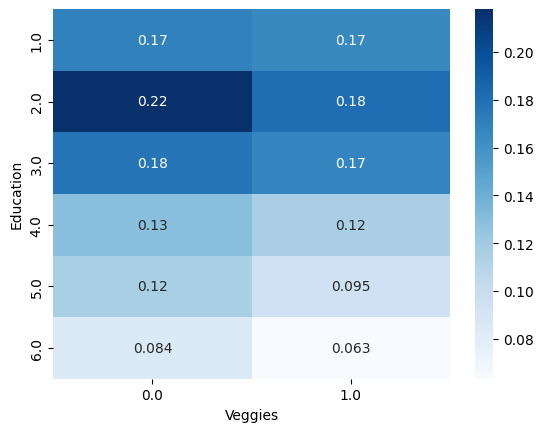

In [ ]:
ev = heart.groupby(['Education', 'Veggies'])['HeartDiseaseorAttack'].mean()
ev

sns.heatmap(ev.unstack(), annot=True, cmap='Blues')

<Axes: xlabel='HvyAlcoholConsump', ylabel='Smoker'>

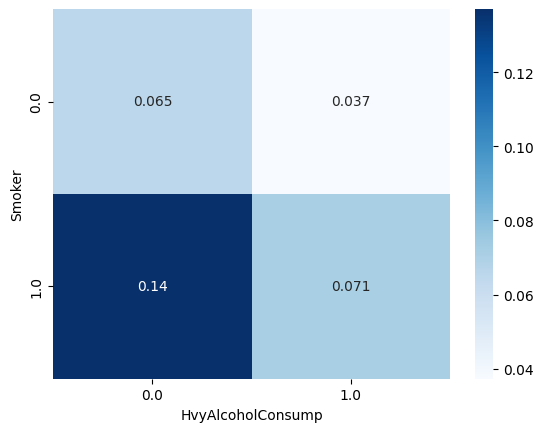

In [ ]:
# smoking and alcohol

sa = heart.groupby(['Smoker', 'HvyAlcoholConsump'])['HeartDiseaseorAttack'].mean()
sa

sns.heatmap(sa.unstack(), annot=True, cmap='Blues')

In [ ]:
# education and smoking

se = heart.groupby('Education')['Smoker'].mean()
se

,Smoker
Education,
1.0,0.379310
2.0,0.484789
3.0,0.622072
4.0,0.531044
5.0,0.491603
6.0,0.342977


Text(0.5, 1.0, 'Education vs Smoking')

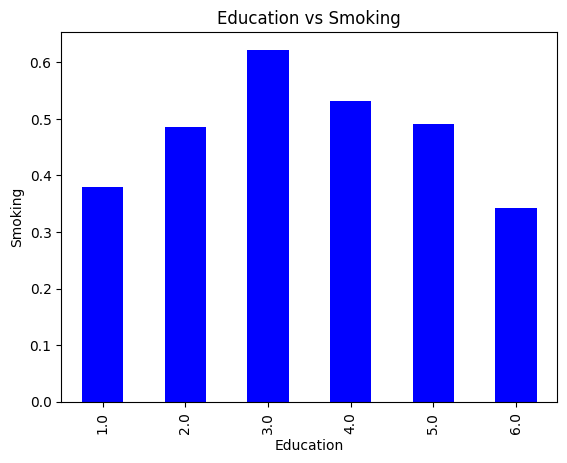

In [ ]:
se.plot(kind='bar', color='blue')
plt.xlabel('Education')
plt.ylabel('Smoking')
plt.title('Education vs Smoking')

In [ ]:
# income and alcohol abuse

ia = heart.groupby('Income')['HvyAlcoholConsump'].mean()
ia

# as income increases the alcohol consumption increseas too
# and look for the heart disease now

,HvyAlcoholConsump
Income,
1.0,0.037305
2.0,0.032844
3.0,0.038827
4.0,0.040675
5.0,0.045551
6.0,0.052646
7.0,0.060483
8.0,0.070255


Text(0.5, 1.0, 'Income vs Alcohol Consumption')

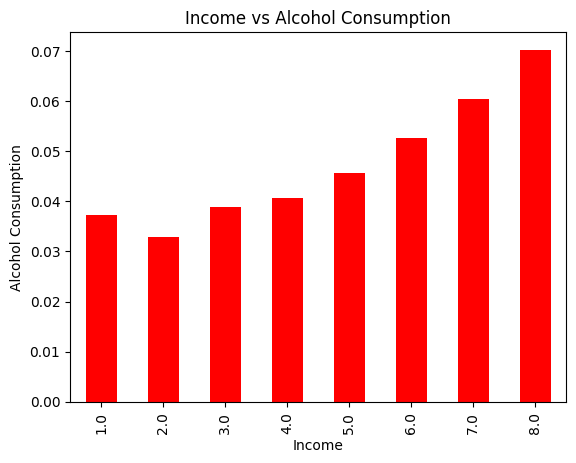

In [ ]:
ia.plot(kind='bar', color='red')
plt.xlabel('Income')
plt.ylabel('Alcohol Consumption')
plt.title('Income vs Alcohol Consumption')

ML MODELS FOR GENERAL PUBLIC

In [ ]:
heart = pd.read_csv('/content/heartdisease_u5z_lx9fv.csv')
heart.head()
heart.isnull().sum()
heart.fillna(0, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x = heart.drop('HeartDiseaseorAttack', axis=1)
y= heart['HeartDiseaseorAttack']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

model = LinearRegression()
model.fit(x_train, y_train)

r2 = model.score(x_test, y_test)
print('R-squared:', r2)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

R-squared: 0.11728155300378895
Mean Squared Error: 0.0757800836115346


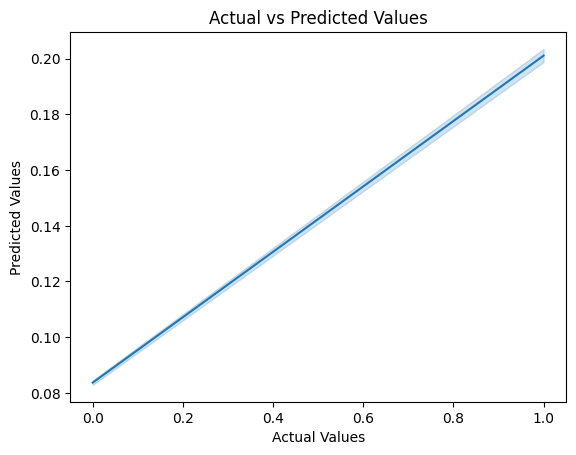

In [ ]:
sns.lineplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

Other ML Models: Random Forest, Decision Trees, Naive Bayes, SVR, KNN, Gradient Boosting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

Text(0, 0.5, 'Predicted Values')

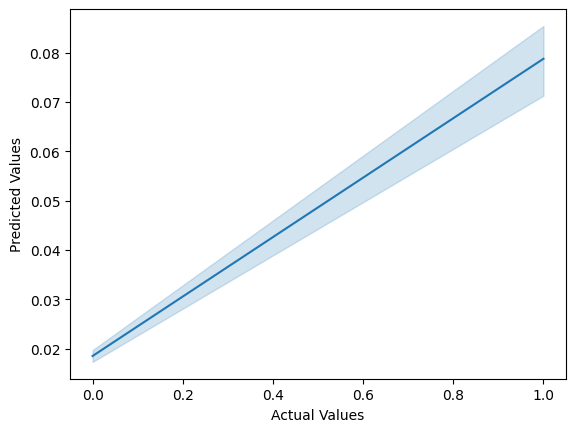

In [ ]:
sns.lineplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Accuracy: 0.8487661620939767


Text(0, 0.5, 'Predicted Values')

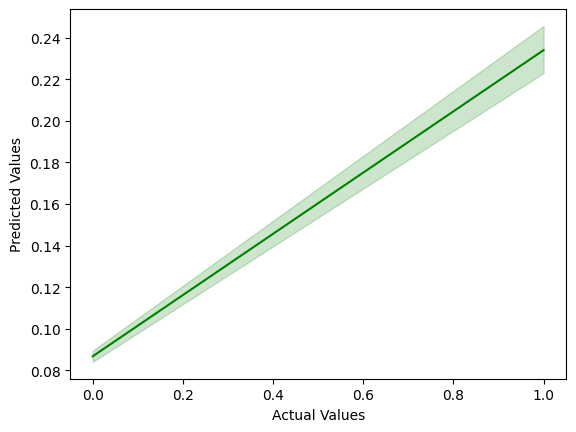

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

sns.lineplot(x=y_test, y=y_pred, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Accuracy: 0.8295096184169032


Text(0, 0.5, 'Predicted Values')

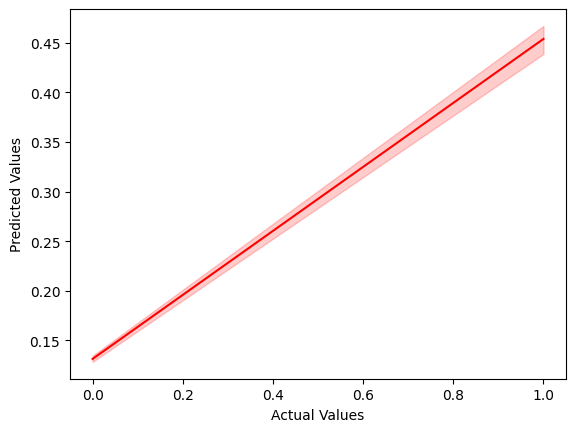

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

sns.lineplot(x=y_test, y=y_pred, color = 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Accuracy: 0.90509697256386


Text(0, 0.5, 'Predicted Values')

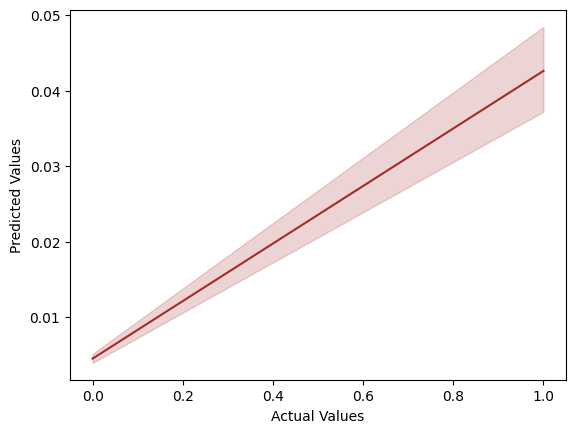

In [ ]:
model = GradientBoostingClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

sns.lineplot(x=y_test, y=y_pred, color = 'brown')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Over and undersampling

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

x = x.iloc[:len(y)]

X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y)

smote = SMOTE(random_state = 42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [202944, 190260]

In [ ]:
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import SMOTE

X, y = make_classification(n_samples=10000, n_classes=2,
                           weights=[0.9, 0.1], random_state=42)

print(Counter(y))

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

print(Counter(y_resampled))

Counter({np.int64(0): 8968, np.int64(1): 1032})
Counter({np.int64(0): 8968, np.int64(1): 8968})


In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

IndexError: indices are out-of-bounds

ML MODELS FOR PEOPLE WITH HEART DISEASE

Here we are going to select the features from people with heart disease and build and train models with those parameters

In [ ]:
heart_disease.columns

Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'Diabetes', 'PhysActivity',
       'Fruits', 'Veggies', 'HvyAlcoholConsump', 'MentHlth', 'PhysHlth', 'Sex',
       'Age', 'Education', 'Income'],
      dtype='object')

In [ ]:
x = heart.drop('HighBP', axis=1)
y= heart['HighBP']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)

r2 = model.score(x_test, y_test)
print('R-squared:', r2)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


R-squared: 0.2431565815633463
Mean Squared Error: 0.18572751898581497


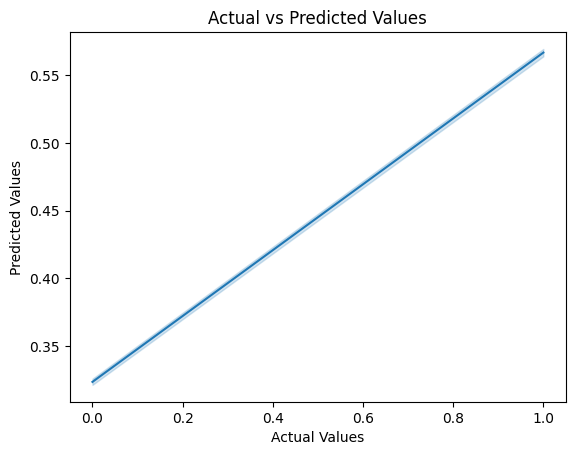

In [ ]:
sns.lineplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

STATISTICAL ANALYSIS